In [16]:
# Name :- lUXSHAN S.
# Index No :- 190364C

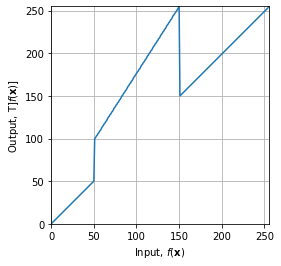

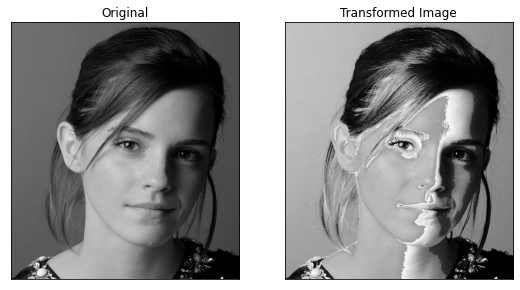

In [18]:
# Question 1

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c= np.array([(50, 50), (50, 100) , (150, 255), (150,150) , (255,255)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1-0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np. linspace(c[1,1], c[2,1], c[2,0]-c[1,0]).astype('uint8')
t4 = np. linspace(c[2,1], c[3,1], c[3,0]-c[2,0]).astype('uint8')
t5 = np. linspace(c[3,1], c[4,1], c[4,0]-c[3,0]).astype('uint8')
transform = np.concatenate((t1,t2,t3,t4), axis=0).astype('uint8') 
transform = np.concatenate((transform, t5), axis=0).astype('uint8')

fig,ax = plt.subplots() 
ax.plot(transform)

ax.set_xlabel(r'Input, $f(\mathbf {x})$') 
ax.set_ylabel('Output, $\mathrm{T}]f(\mathbf {x})]$')
ax.set_xlim (0,255)
ax.set_ylim (0,255) 
ax.set_aspect('equal')
plt. savefig('transform.png')
plt.grid()
plt.show()
img_orig = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
image_transformed = cv.LUT(img_orig, transform) 
fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(9,9))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed, cmap='gray')
axes[1].set_title('Transformed Image')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()


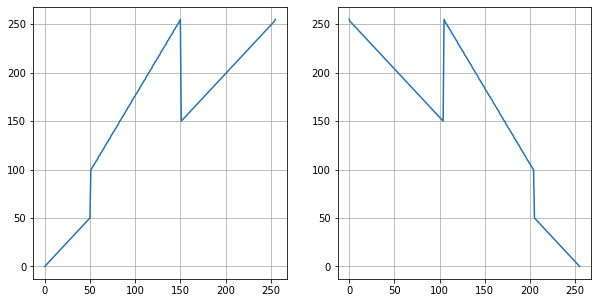

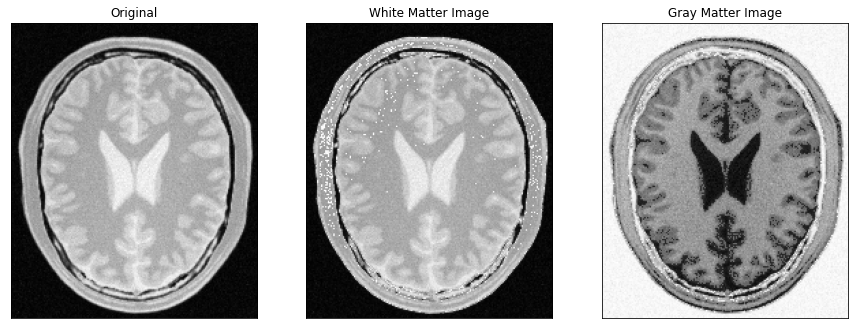

In [24]:
# Question 2 (a) (b)

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c= np.array([(50, 50), (50, 100) , (150, 255), (150,150) , (255,255)])
t1 = np.linspace(0, c[0,1], c[0,0] + 1-0).astype('uint8')
t2 = np.linspace(c[0, 1] + 1, c[1,1], c[1,0]-c[0,0]).astype('uint8')
t3 = np. linspace(c[1,1], c[2,1], c[2,0]-c[1,0]).astype('uint8')
t4 = np. linspace(c[2,1], c[3,1], c[3,0]-c[2,0]).astype('uint8')
t5 = np. linspace(c[3,1], c[4,1], c[4,0]-c[3,0]).astype('uint8')
transform1 = np.concatenate((t1,t2,t3,t4), axis=0).astype('uint8') 
transform1 = np.concatenate((transform1, t5), axis=0).astype('uint8')

c= np.array([(50, 50), (50, 100) , (150, 255), (150,150) , (255,255)])
t6 = np.linspace( c[0,1],0, c[0,0] + 1-0).astype('uint8')
t7 = np.linspace( c[1,1],c[0, 1] + 1, c[1,0]-c[0,0]).astype('uint8')
t8 = np. linspace( c[2,1],c[1,1], c[2,0]-c[1,0]).astype('uint8')
t9 = np. linspace( c[3,1],c[2,1], c[3,0]-c[2,0]).astype('uint8')
t10 = np. linspace( c[4,1],c[3,1], c[4,0]-c[3,0]).astype('uint8')
transform2 = np.concatenate((t10,t9,t8,t7), axis=0).astype('uint8') 
transform2 = np.concatenate((transform2, t6), axis=0).astype('uint8')



fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(transform1)
ax[1].plot(transform2)
ax[0].grid()
ax[1].grid()
plt.show()

img_orig = cv.imread('brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
image_transformed1 = cv.LUT(img_orig, transform1) 
image_transformed2 = cv.LUT(img_orig, transform2) 
fig, axes  = plt.subplots(1,3, sharex='all', sharey='all', figsize=(15,15))
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(image_transformed1, cmap='gray')
axes[1].set_title('White Matter Image')
axes[1].set_xticks([]), axes[1].set_yticks([])
axes[2].imshow(image_transformed2, cmap='gray')
axes[2].set_title('Gray Matter Image')
axes[2].set_xticks([]), axes[1].set_yticks([])
plt.show()


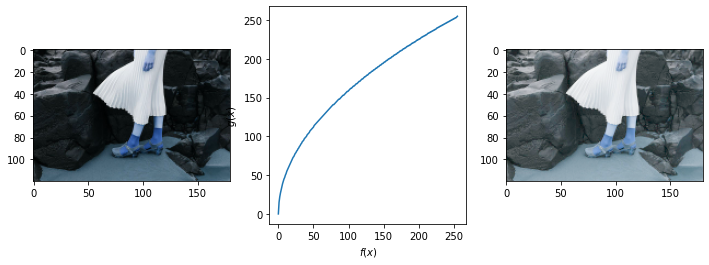

In [4]:
# Question 3 (a)

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('highlights_and_shadows.jpg', cv.COLOR_BGR2LAB)
assert f is not None

gamma = 0.5
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
g = cv.LUT(f, t)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(f, cmap='gray')
ax[1].plot(t)
ax[1].set_xlabel('$f(x)$')
ax[1].set_ylabel('$g(x)$')
ax[2].imshow(g, cmap='gray')
plt.show()

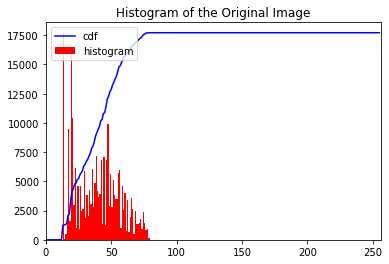

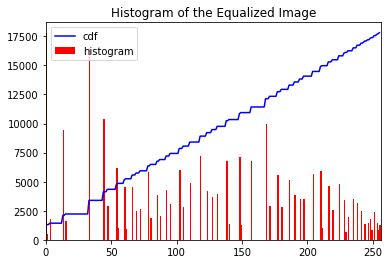

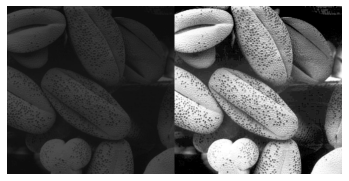

In [20]:
# Question 4
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread("shells.png",cv.IMREAD_GRAYSCALE) 
hist, bins = np.histogram(img.ravel(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf*hist.max() / cdf.max() 
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256],color='r') 
plt.xlim ([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title ('Histogram of the Original Image')
plt.show() 
equ = cv.equalizeHist(img)
hist, bins = np.histogram (equ.ravel(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/cdf.max()
plt.plot (cdf_normalized, color = 'b')
plt.hist(equ.flatten (),256,[0,256], color = 'r') 
plt.xlim ([0,256])
plt.legend (('cdf', 'histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()
res = np.hstack ((img, equ))
plt.axis('off')
plt.imshow (res, cmap= 'gray')

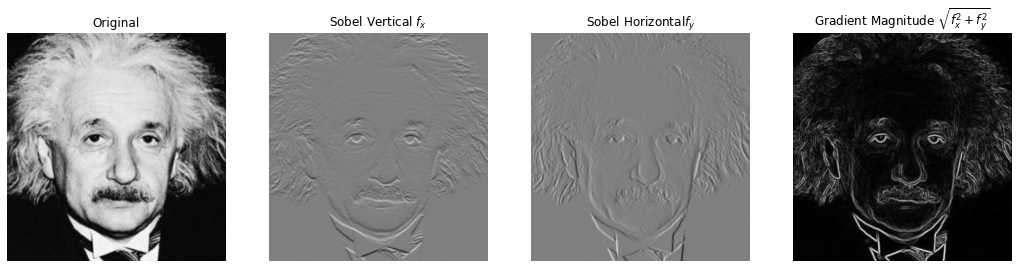

In [1]:
# Question 6

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE).astype(np. float32)


sobel_v = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32) 
f_x = cv.filter2D(f, -1, sobel_v) 
sobel_h = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
f_y = cv.filter2D(f, -1, sobel_h) 
grad_mag = np.sqrt(f_x**2 + f_y**2)
                   
fig, ax = plt.subplots (1,4, figsize=(18,6)) 
ax[0].imshow(f, cmap='gray', vmin=0, vmax=255) 
ax[0].set_title('Original')
ax[1].imshow(f_x, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title(r'Sobel Vertical $f_x$')
ax[2].imshow(f_y, cmap="gray", vmin=-1020, vmax=1020) 
ax[2].set_title(r'Sobel Horizontal$f_y$')
ax[3].imshow(grad_mag, cmap="gray")
ax[3].set_title(r'Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$')

for i in range (4):
    ax[i].axis('off')
plt.show()

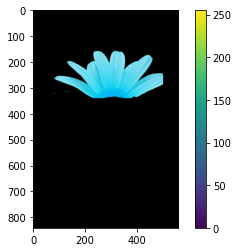

In [5]:
# Question 7 (a)

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread("daisy.jpg")
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)

cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img)
plt.colorbar()
plt.show()


In [ ]:
Question 7 (b)
import cv2
img = cv2.imread("zion_pass.jpg",cv.IMREAD_COLOR)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
greenMask = cv2.inRange(hsv, (26, 10, 30), (97, 100, 255))
img[greenMask == 255] = (0, 255, 0)
cv2.imshow('test', img)
plt.imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
import cv2
lab = cv2.cvtColor('highlights_and_shadows.jpg', cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b*", lab)

# loop over each of the individual channels and display them
for (name, chan) in zip(("L*", "a*", "b*"):
    cv2.split(lab))
    cv2.imshow(name, chan)

# wait for a keypress, then close all open windows
cv2.waitKey(0)
cv2.destroyAllWindows()

SyntaxError: invalid syntax (<ipython-input-8-b9f3bddf7561>, line 6)